In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
# Read all CSV files into DataFrames
users_df = pd.read_csv("users.csv",parse_dates=['date_of_birth','registration_date'], dayfirst=True)
courses_df = pd.read_csv("courses.csv",parse_dates=['created_on','last_updated_on'], dayfirst=True)
ratings_df = pd.read_csv("ratings.csv",parse_dates=['first_reviewed_on','last_updated_on'], dayfirst=True)
enrollments_df = pd.read_csv("enrollments.csv",parse_dates=['enrollment_date'], dayfirst=True)
payments_df = pd.read_csv("payments.csv",parse_dates=['transaction_date'], dayfirst=True)
refunds_df = pd.read_csv("refunds.csv",parse_dates=['refund_date'], dayfirst=True)

In [165]:
print("Users DataFrame columns:", users_df.columns.tolist(), "\n")
print("Courses DataFrame columns:", courses_df.columns.tolist(), "\n")
print("Ratings DataFrame columns:", ratings_df.columns.tolist(), "\n")
print("Enrollments DataFrame columns:", enrollments_df.columns.tolist(), "\n")
print("Payments DataFrame columns:", payments_df.columns.tolist(), "\n")
print("Refunds DataFrame columns:", refunds_df.columns.tolist(), "\n")

Users DataFrame columns: ['user_id', 'name', 'date_of_birth', 'email', 'gender', 'category', 'registration_date', 'country', 'last_login_date', 'user_type'] 

Courses DataFrame columns: ['course_id', 'title', 'category', 'language', 'subtitles', 'price', 'instructor_id', 'length', 'difficulty_level', 'created_on', 'last_updated_on', 'number_of_videos', 'number_of_quizzes', 'view_count', 'average_watch_duration', 'certification_available', 'completion_rate', 'bookmark_count'] 

Ratings DataFrame columns: ['review_id', 'course_id', 'student_id', 'rating', 'review_text', 'first_reviewed_on', 'last_updated_on', 'helpful_count', 'reported_count'] 

Enrollments DataFrame columns: ['enrollment_id', 'student_id', 'course_id', 'enrollment_date'] 

Payments DataFrame columns: ['payment_id', 'enrollment_id', 'discount_percent', 'amount_paid', 'coupon_code', 'payment_method', 'transaction_date', 'transaction_id', 'payment_status'] 

Refunds DataFrame columns: ['refund_id', 'enrollment_id', 'refund

In [167]:
# 50. How many courses are free and how many courses have a price associated with them?
print("50. Free courses & Paid courses:")
free_courses = courses_df[courses_df['price'] == 0].shape[0]
paid_courses = courses_df[courses_df['price'] > 0].shape[0]
print(f"Free courses: {free_courses}, Paid courses: {paid_courses}")

50. Free courses & Paid courses:
Free courses: 18, Paid courses: 45


In [169]:
# 51. How many courses is each instructor teaching on the platform?
instructor_course_count = courses_df['instructor_id'].value_counts()
print(f"51. Courses taught by each instructor:\n{instructor_course_count}")

51. Courses taught by each instructor:
instructor_id
457246    6
220585    5
871007    5
668495    4
536923    4
751788    3
712134    3
582060    3
767050    3
838186    3
525207    3
278667    3
204568    2
764597    2
632410    2
288315    2
173468    2
742878    2
417012    1
241479    1
364202    1
424379    1
295438    1
370558    1
Name: count, dtype: int64


In [171]:
# 52. Which courses are the most popular based on the number of bookmarks?
popular_courses = courses_df.nlargest(5, 'bookmark_count')
print(f"52. Most popular courses based on bookmarks:\n{popular_courses[['title', 'bookmark_count']]}")

52. Most popular courses based on bookmarks:
                                            title  bookmark_count
34                Genetics: From DNA to Evolution             485
13                             Python Masterclass             476
24  Physics Made Simple: Fundamentals to Advanced             458
11       Instructional Design for Online Learning             452
15            Leadership and Strategic Management             450


In [173]:
# 53. How many users are registered in each user category?
user_category_count = users_df['category'].value_counts()
print(f"53. Users registered in each category:\n{user_category_count}")

53. Users registered in each category:
category
retired      766
homemaker    744
student      717
working      715
Name: count, dtype: int64


In [175]:
# 54. What is the male-to-female ratio among the users?
gender_ratio = users_df['gender'].value_counts()
male_to_female_ratio = gender_ratio['male'] / gender_ratio['female']
print(f"54. Male to Female Ratio: {male_to_female_ratio:.2f}")

54. Male to Female Ratio: 1.52


In [177]:
# 55. Which courses have the worst completion rates?
worst_completion_courses = courses_df.nsmallest(5, 'completion_rate')
print(f"55. Courses with the worst completion rates:\n{worst_completion_courses[['title', 'completion_rate']]}")

55. Courses with the worst completion rates:
                                               title  completion_rate
27             Biology: Understanding the Human Body            12.52
7                    Introduction to Quantum Physics            12.88
17  Project Management: From Initiation to Execution            13.52
14                     Digital Marketing Masterclass            16.09
22                 Photography: From Beginner to Pro            16.54


In [179]:
# 56. What is the most common rating given by students?
most_common_rating = ratings_df['rating'].mode()[0]
print(f"56. Most common rating given by students: {most_common_rating}")

56. Most common rating given by students: 5


In [181]:
# 57. How many unique users are enrolled in at least one course?
unique_users = enrollments_df['student_id'].nunique()
print(f"57. Unique users enrolled in at least one course: {unique_users}")

57. Unique users enrolled in at least one course: 261


In [183]:
# 58. How many users are enrolled in multiple courses?
multiple_enrollments = enrollments_df['student_id'].value_counts()
users_with_multiple_courses = (multiple_enrollments > 1).sum()
print(f"58. Users enrolled in multiple courses: {users_with_multiple_courses}")

58. Users enrolled in multiple courses: 14


In [185]:
# 59. Which 5 courses have the most enrollments?
top_enrolled_courses = enrollments_df['course_id'].value_counts().nlargest(5)
print(f"59. Top 5 courses with the most enrollments:\n{top_enrolled_courses}")

59. Top 5 courses with the most enrollments:
course_id
76064    20
64796    19
92956    18
79177    18
13258    15
Name: count, dtype: int64


In [187]:
# 60. Find the total revenue generated from successful payments.
total_revenue = payments_df[payments_df['payment_status'] == 'success']['amount_paid'].sum()
print(f"60. Total revenue from successful payments: ${total_revenue:.2f}")

60. Total revenue from successful payments: $3770.50


In [189]:
# 61. What is the average discount percentage applied across all discounted payments?
average_discount = payments_df[payments_df['discount_percent'] > 0]['discount_percent'].mean()
print(f"61. Average discount percentage: {average_discount:.2f}%")

61. Average discount percentage: 16.35%


In [191]:
# 62. Find top 3 countries with the highest number of students.
top_countries = users_df['country'].value_counts().nlargest(3)
print(f"62. Top 3 countries with the highest number of students:\n{top_countries}")

62. Top 3 countries with the highest number of students:
country
India    1163
US        865
China     526
Name: count, dtype: int64


In [193]:
# 63. What is the most common reason for refunds?
common_refund_reason = refunds_df['refund_reason'].mode()[0]
print(f"63. Most common reason for refunds: {common_refund_reason}")

63. Most common reason for refunds: Course content not satisfactory


In [195]:
# 64. Add an age column to the users table and then calculate average age of the students on the website.
users_df['date_of_birth'] = pd.to_datetime(users_df['date_of_birth'])
users_df['age'] = (datetime.now() - users_df['date_of_birth']).dt.days // 365
average_age = users_df['age'].mean()
print(f"64. Average age of students: {average_age:.2f}")

64. Average age of students: 41.73


In [197]:
# 65. Find average age of the students in each course.
average_age_per_course = enrollments_df.merge(users_df[['user_id', 'age']], left_on='student_id', right_on='user_id').groupby('course_id')['age'].mean()
print(f"65. Average age of students in each course:\n{average_age_per_course}")

65. Average age of students in each course:
course_id
13258    41.666667
18426    39.846154
20195    51.000000
21108    37.785714
21248    38.500000
22005    69.000000
27385    46.500000
27431    15.500000
30371    41.733333
30790    47.000000
31874    34.000000
32369    38.500000
33057    42.416667
39766    23.000000
45770    36.200000
48950    80.000000
49963    29.461538
51293    47.181818
54046    43.000000
54145    47.555556
56446    41.750000
56799    42.500000
59716    17.000000
62276    34.000000
62660    30.000000
64561    66.666667
64796    39.684211
65005    33.375000
67194    35.000000
72387    62.000000
76064    42.600000
78724    49.250000
79177    39.888889
85886    26.000000
86558    48.000000
86724    47.000000
89472    24.000000
92956    49.722222
93178    38.000000
93568    54.000000
93619    43.133333
96323    54.000000
97039    41.000000
97988    40.866667
99133    50.000000
Name: age, dtype: float64


In [199]:
# 66. Find average age of the students in each course category.
average_age_per_category = enrollments_df.merge(users_df[['user_id', 'age']], left_on='student_id', right_on='user_id').merge(courses_df[['course_id', 'category']], on='course_id').groupby('category')['age'].mean()
print(f"66. Average age of students in each course category:\n{average_age_per_category}")

66. Average age of students in each course category:
category
Arts and Design               43.600000
Business and Management       42.687500
Education                     39.464789
Health                        43.057143
Personal Development          65.000000
Science and Mathematics       39.837209
Technology and Programming    41.452381
Name: age, dtype: float64


In [201]:
# 67. Calculate the average age of users for each user category.
average_age_per_user_category = users_df.groupby('category')['age'].mean()
print(f"67. Average age of users for each user category:\n{average_age_per_user_category}")

67. Average age of users for each user category:
category
homemaker    41.967742
retired      41.694517
student      41.179916
working      42.067133
Name: age, dtype: float64


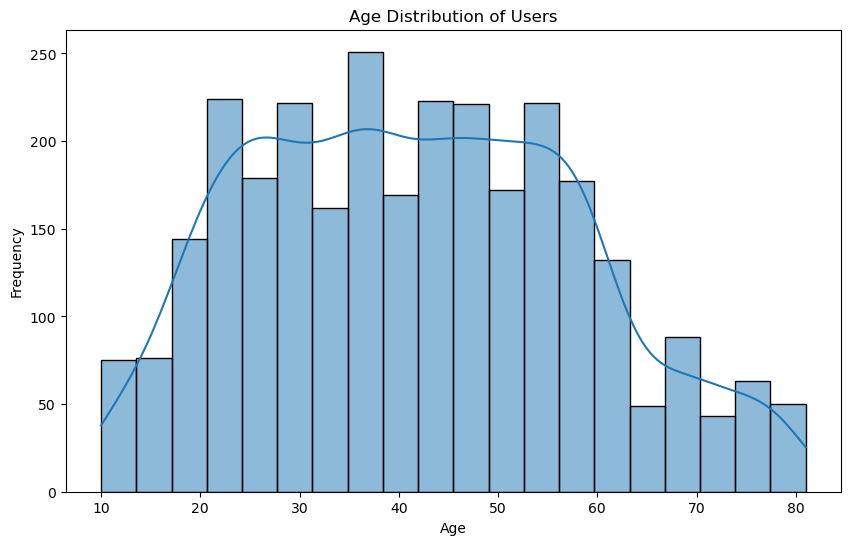

In [203]:
# 68. Plot the age distribution of all the users.
plt.figure(figsize=(10, 6))
sns.histplot(users_df['age'], bins=20, kde=True)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

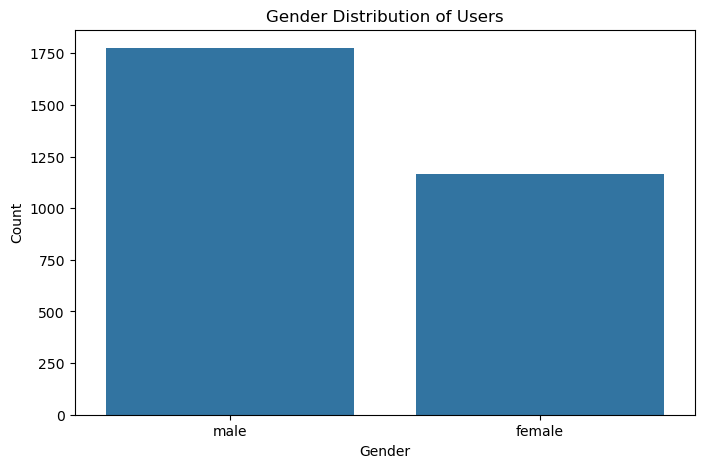

In [204]:
# 69. Plot the gender distribution to understand the gender breakdown of users.
plt.figure(figsize=(8, 5))
sns.countplot(data=users_df, x='gender')
plt.title('Gender Distribution of Users')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

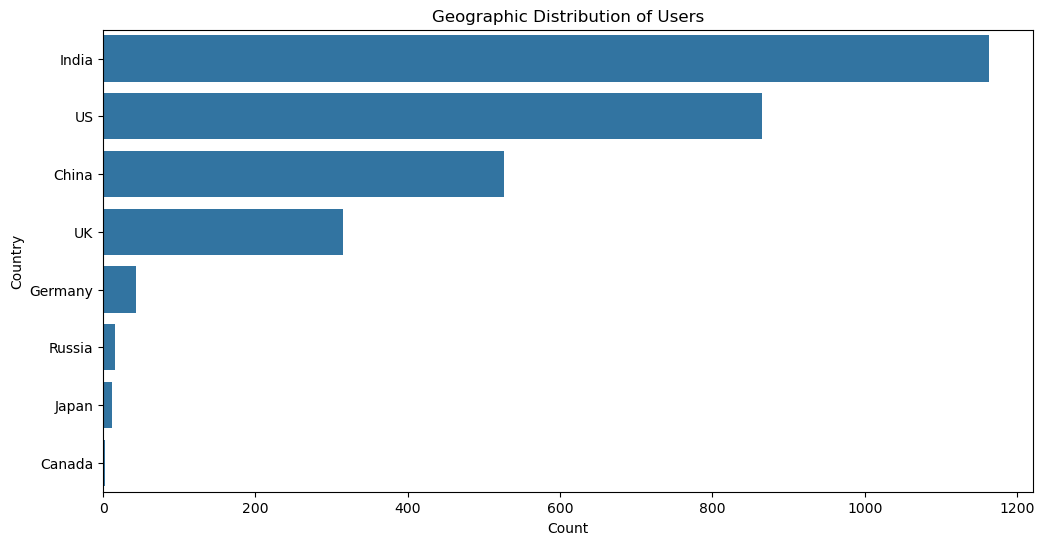

In [205]:
# 70. Plot the geographic distribution of users (based on country).
plt.figure(figsize=(12, 6))
sns.countplot(data=users_df, y='country', order=users_df['country'].value_counts().index)
plt.title('Geographic Distribution of Users')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

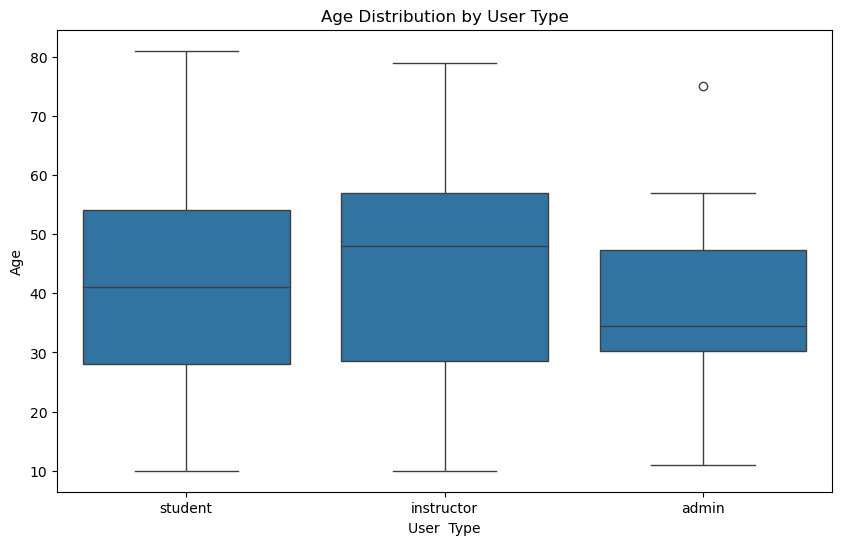

In [206]:
# 71. Show how the age distribution varies for different user types.
plt.figure(figsize=(10, 6))
sns.boxplot(data=users_df, x='user_type', y='age')
plt.title('Age Distribution by User Type')
plt.xlabel('User  Type')
plt.ylabel('Age')
plt.show()

In [209]:
# 72. Find the top 5 most popular courses based on view counts.
top_viewed_courses = courses_df.nlargest(5, 'view_count')
print(f"72. Top 5 most popular courses based on view counts:\n{top_viewed_courses[['title', 'view_count']]}")

72. Top 5 most popular courses based on view counts:
                                    title  view_count
29    Full-Stack Web Development Bootcamp        9989
27  Biology: Understanding the Human Body        9821
35     Mastering React: Advanced Concepts        9445
33     Marine Biology: Life Under the Sea        9320
34        Genetics: From DNA to Evolution        9230


In [210]:
top_courses_per_category = courses_df.groupby('category')['view_count'].nlargest(2).reset_index(level=0)
top_courses_per_category = top_courses_per_category.merge(courses_df[['category', 'title', 'view_count']], on=['category','view_count'], how='left')
print(f"73. Top 2 popular courses in each category based on view counts:\n{top_courses_per_category[['category', 'title', 'view_count']]}")

73. Top 2 popular courses in each category based on view counts:
                      category  \
0              Arts and Design   
1              Arts and Design   
2      Business and Management   
3      Business and Management   
4                    Education   
5                    Education   
6                       Health   
7                       Health   
8         Personal Development   
9         Personal Development   
10     Science and Mathematics   
11     Science and Mathematics   
12  Technology and Programming   
13  Technology and Programming   

                                               title  view_count  
0                          UX/UI Design Fundamentals        6196  
1    Graphic Design Essentials: Tools and Techniques        6117  
2   Project Management: From Initiation to Execution        6857  
3             Financial Analysis for Decision-Making        4575  
4             Early Childhood Education Fundamentals        8285  
5                   Ch

In [212]:
# 74. What is the average course duration per category?
courses_df['length'] = pd.to_numeric(courses_df['length'], errors='coerce')
average_duration_per_category = courses_df.groupby('category')['length'].mean()
print(f"74. Average course duration per category:\n{average_duration_per_category}")

74. Average course duration per category:
category
Arts and Design              NaN
Business and Management      NaN
Education                    NaN
Health                       NaN
Personal Development         NaN
Science and Mathematics      NaN
Technology and Programming   NaN
Name: length, dtype: float64


In [217]:
# 75. Find the top 5 highest revenue generating courses.
revenue_per_course = enrollments_df.merge(payments_df, on='enrollment_id').groupby('course_id')['amount_paid'].sum().nlargest(5)
print(f"75. Top 5 highest revenue generating courses:\n{revenue_per_course}")

75. Top 5 highest revenue generating courses:
course_id
64561    345.80
78724    335.80
56446    295.25
21248    278.00
62660    249.00
Name: amount_paid, dtype: float64


In [219]:
# 76. What is the average transaction amount for each payment method?
average_transaction_per_method = payments_df.groupby('payment_method')['amount_paid'].mean()
print(f"76. Average transaction amount for each payment method:\n{average_transaction_per_method}")

76. Average transaction amount for each payment method:
payment_method
PayPal    81.346667
UPI       89.202632
card      99.450000
Name: amount_paid, dtype: float64


In [221]:
# 77. Calculate the average rating for each course and add a column average_rating in courses_df.
average_rating_per_course = ratings_df.groupby('course_id')['rating'].mean()
courses_df['average_rating'] = courses_df['course_id'].map(average_rating_per_course)
print(f"77. Average rating for each course added to courses_df:\n{average_rating_per_course}")

77. Average rating for each course added to courses_df:
course_id
12938    4.600000
13258    3.666667
18426    3.800000
20195    4.000000
20671    5.000000
21108    3.800000
21248    4.000000
22005    3.857143
23531    4.800000
27385    4.125000
27431    4.666667
30371    2.000000
30790    4.000000
31874    4.000000
32369    4.666667
33057    4.375000
39766    4.333333
42258    4.500000
45749    4.500000
48950    3.333333
49963    4.000000
51293    3.428571
51452    4.600000
53452    5.000000
54046    4.250000
54145    4.000000
56446    4.142857
56799    3.666667
56956    4.500000
57353    4.000000
59716    2.000000
60079    3.333333
62276    4.666667
62660    4.666667
64561    5.000000
64796    4.000000
65005    4.250000
67194    4.500000
68511    2.500000
69513    4.500000
71838    4.200000
72387    4.000000
74770    3.500000
76064    3.800000
77946    4.666667
78724    3.400000
79177    4.333333
85886    4.666667
86558    3.750000
86724    4.500000
89472    3.000000
92956    4.00000

In [223]:
# 78. Find 2 top rated courses in each course category.
top_courses_per_category = courses_df.groupby('category')['average_rating'].nlargest(2).reset_index(level=0)
top_courses_per_category = top_courses_per_category.merge(courses_df[['category', 'title', 'average_rating']], on=['category','average_rating']
                                                          , how='left')
print(f"78. Top 2 rated courses in each category:\n{top_rated_courses_per_category[['category', 'title', 'average_rating']]}")

78. Top 2 rated courses in each category:
                                                 category  \
category                                                    
Arts and Design            22             Arts and Design   
                           19             Arts and Design   
Business and Management    18     Business and Management   
                           16     Business and Management   
Education                  62                   Education   
                           12                   Education   
Health                     47                      Health   
                           51                      Health   
Personal Development       40        Personal Development   
                           38        Personal Development   
Science and Mathematics    27     Science and Mathematics   
                           31     Science and Mathematics   
Technology and Programming 13  Technology and Programming   
                           25  Technology a

In [225]:
# 79. Display the average rating of each course category.
average_rating_per_category = courses_df.groupby('category')['average_rating'].mean()
print(f"79. Average rating of each course category:\n{average_rating_per_category}")

79. Average rating of each course category:
category
Arts and Design               4.426667
Business and Management       4.276667
Education                     4.015152
Health                        4.191005
Personal Development          3.533333
Science and Mathematics       3.951667
Technology and Programming    4.025680
Name: average_rating, dtype: float64


In [227]:
# 80. Calculate the average rating for each instructor.
average_rating_per_instructor = ratings_df.merge(courses_df[['course_id', 'instructor_id']], on='course_id').groupby('instructor_id')['rating'].mean()
print(f"80. Average rating for each instructor:\n{average_rating_per_instructor}")

80. Average rating for each instructor:
instructor_id
173468    4.000000
204568    4.000000
220585    4.240000
241479    4.125000
278667    3.583333
288315    3.625000
295438    4.000000
364202    4.333333
370558    4.500000
417012    3.800000
424379    4.200000
457246    4.333333
525207    4.000000
536923    4.400000
582060    4.153846
632410    4.400000
668495    3.866667
712134    4.083333
742878    4.666667
751788    4.181818
764597    4.000000
767050    3.750000
838186    3.833333
871007    3.944444
Name: rating, dtype: float64


In [229]:
# 81. Display courses with no ratings.
no_rating_courses = courses_df[courses_df['average_rating'].isnull()]
print(f"81. Courses with no ratings:\n{no_rating_courses[['title']]}")

81. Courses with no ratings:
                                            title
1              Advanced Mathematics for Engineers
24  Physics Made Simple: Fundamentals to Advanced
28                   Introduction to Astrophysics
44            Mental Health Awareness and Support


In [231]:
# 82. Find courses that have no students enrolled in them.
enrolled_courses = enrollments_df['course_id'].unique()
no_enrollment_courses = courses_df[~courses_df['course_id'].isin(enrolled_courses)]
print(f"82. Courses that have no students enrolled:\n{no_enrollment_courses[['title']]}")

82. Courses that have no students enrolled:
                                                title
18  Entrepreneurship 101: Building Your First Startup
21       Python for Data Science and Machine Learning
24      Physics Made Simple: Fundamentals to Advanced
25                          Data structures through C
28                       Introduction to Astrophysics
30              Climate Change: Science and Solutions
31             Biotechnology: Applications and Impact
33                 Marine Biology: Life Under the Sea
37                  Mindfulness and Stress Management
38          Public Speaking and Communication Mastery
41             Time Management for Busy Professionals
43                         Data structures through C#
44                Mental Health Awareness and Support
47  Anatomy and Physiology: Understanding the Huma...
51                Introduction to Medical Terminology
55                       Data structures through Java
61           Developing Curriculum for

In [233]:
# 83. Find the number of students from each country based on their enrollments.
students_per_country = enrollments_df.merge(users_df[['user_id', 'country']
                                            ], left_on='student_id', right_on='user_id').groupby('country')['student_id'].nunique()
print(f"83. Number of students from each country based on their enrollments:\n{students_per_country}")

83. Number of students from each country based on their enrollments:
country
China      54
Germany     6
India      95
UK         35
US         71
Name: student_id, dtype: int64


In [235]:
# 84. Get the course popularity details by country.
course_popularity_by_country = enrollments_df.merge(users_df[['user_id', 'country']], left_on='student_id', right_on='user_id'
                                                   ).groupby(['country', 'course_id']).size().reset_index(name='enrollment_count')
most_popular_course_by_country = course_popularity_by_country.loc[course_popularity_by_country.groupby('country')['enrollment_count'].idxmax()]
print(f"84. Course popularity details by country:\n{most_popular_course_by_country}")

84. Course popularity details by country:
    country  course_id  enrollment_count
9     China      49963                 5
25  Germany      27385                 1
59    India      93619                 9
74       UK      64796                 5
94       US      64796                 8


In [237]:
# 85. Find the top 5 bestselling paid courses.
bestselling_paid_courses = enrollments_df.merge(payments_df[payments_df['amount_paid'] > 0],
                                                on='enrollment_id').groupby('course_id')['amount_paid'].sum().nlargest(5)
print(f"85. Top 5 bestselling paid courses:\n{bestselling_paid_courses}")

85. Top 5 bestselling paid courses:
course_id
64561    345.80
78724    335.80
56446    295.25
21248    278.00
62660    249.00
Name: amount_paid, dtype: float64


In [239]:
# 86. Find the bestselling course in each category.
bestselling_course_per_category = (enrollments_df.merge(payments_df, on='enrollment_id').merge(courses_df, on='course_id')
                                   .groupby(['course_id', 'category'])['amount_paid'].sum().reset_index())
bestselling_course_per_category = (bestselling_course_per_category.loc[bestselling_course_per_category.groupby('category')['amount_paid'].idxmax()])
print(f"86. Bestselling course in each category:\n{bestselling_course_per_category[['category', 'course_id', 'amount_paid']]}")

86. Bestselling course in each category:
                      category  course_id  amount_paid
15             Arts and Design      64561       345.80
18                   Education      78724       335.80
25                      Health      96323       173.70
26        Personal Development      99133        99.00
14     Science and Mathematics      62660       249.00
10  Technology and Programming      56446       295.25


In [241]:
# 87. Calculate the number of free enrollments and paid enrollments.
free_enrollments = enrollments_df[enrollments_df['enrollment_id'].isin(payments_df[payments_df['amount_paid'] == 0]['enrollment_id'])].shape[0]
paid_enrollments = enrollments_df[enrollments_df['enrollment_id'].isin(payments_df[payments_df['amount_paid'] > 0]['enrollment_id'])].shape[0]
print(f"87. Free enrollments: {free_enrollments}, Paid enrollments: {paid_enrollments}")

87. Free enrollments: 0, Paid enrollments: 43


In [243]:
# 88. Find correlation between the number of videos and the completion_rate.
correlation_videos_completion = courses_df['number_of_videos'].corr(courses_df['completion_rate'])
print(f"88. Correlation between number of videos and completion rate: {correlation_videos_completion:.2f}")

88. Correlation between number of videos and completion rate: -0.07


In [245]:
# 89. Find the correlation between number of quizzes and average rating for each course.
correlation_quizzes_rating = courses_df['number_of_quizzes'].corr(courses_df['average_rating'])
print(f"89. Correlation between number of quizzes and average rating: {correlation_quizzes_rating:.2f}")

89. Correlation between number of quizzes and average rating: -0.21


In [247]:
# 90. How many payment transactions failed using PayPal?
failed_paypal_transactions = payments_df[(payments_df['payment_method'] == 'PayPal') & (payments_df['payment_status'] == 'failed')].shape[0]
print(f"90. Failed PayPal transactions: {failed_paypal_transactions}")

90. Failed PayPal transactions: 1


In [249]:
# 91. Get a summary of payment methods, including how many successful, failed or pending payments are there for each method.
payment_summary = payments_df.groupby(['payment_method', 'payment_status']).size().unstack(fill_value=0)
print(f"91. Summary of payment methods:\n{payment_summary}")

91. Summary of payment methods:
payment_status  failed  pending  success
payment_method                          
PayPal               1        0       14
UPI                  0        1       18
card                 0        0       11


In [251]:
# 92. Display the courses that were never refunded.
refunded_courses = refunds_df['enrollment_id'].unique()
no_refund_courses = courses_df[~courses_df['course_id'].isin(refunded_courses)]
print(f"92. Courses that were never refunded:\n{no_refund_courses[['title']]}")

92. Courses that were never refunded:
                                                title
0                         Data structures through C++
1                  Advanced Mathematics for Engineers
2             Advanced Data structures through Python
3                     First Aid and CPR Certification
4              Managing Diabetes and Chronic Diseases
..                                                ...
58               AI and Deep Learning with TensorFlow
59                          Gamification in Education
60  Educational Psychology: Enhancing Learning Out...
61           Developing Curriculum for K-12 Education
62                   Childhood Education Fundamentals

[63 rows x 1 columns]


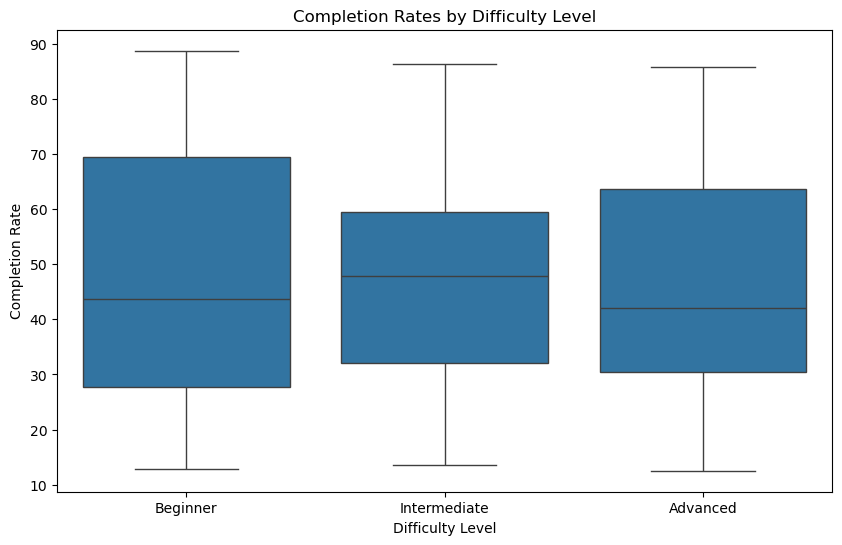

In [253]:
# 93. Use box plot to plot distribution of completion rates by difficulty level.
plt.figure(figsize=(10, 6))
sns.boxplot(data=courses_df, x='difficulty_level', y='completion_rate')
plt.title('Completion Rates by Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Completion Rate')
plt.show()

In [255]:
# 94. Identify the course category with the most enrollments.
most_enrolled_category = enrollments_df.merge(courses_df[['course_id', 'category']], 
                                              on='course_id').groupby('category')['student_id'].nunique().idxmax()
print(f"94. Course category with the most enrollments: {most_enrolled_category}")

94. Course category with the most enrollments: Education


In [259]:
# 95. Find the number of inactive users - users who have not logged in during the last 30 days.
users_df['last_login_date'] = pd.to_datetime(users_df['last_login_date'], format='%d-%m-%Y', errors='coerce')
users_df_cleaned = users_df.dropna(subset=['last_login_date'])
inactive_users = users_df_cleaned[users_df_cleaned['last_login_date'] < (datetime.now() - timedelta(days=30))]
print(f"95. Number of inactive users: {inactive_users.shape[0]}")

95. Number of inactive users: 2250


In [261]:
# 96. What is the average price of courses in each category? (exclude the free courses)
average_price_per_category = courses_df[courses_df['price'] > 0].groupby('category')['price'].mean()
print(f"96. Average price of courses in each category:\n{average_price_per_category}")

96. Average price of courses in each category:
category
Arts and Design                71.000000
Business and Management        81.000000
Education                      94.000000
Health                         93.000000
Personal Development           90.800000
Science and Mathematics       124.900000
Technology and Programming    116.727273
Name: price, dtype: float64


In [271]:
# 97. How many courses are available with subtitles?
courses_with_subtitles = courses_df[courses_df['subtitles'] == 'yes'].shape[0]
print(f"97. Courses available with subtitles: {courses_with_subtitles}")

97. Courses available with subtitles: 55


In [273]:
# 98. What percentage of courses offer certifications?
certification_percentage = (courses_df[courses_df['certification_available'] == 'yes'].shape[0] / courses_df.shape[0]) * 100
print(f"98. Percentage of courses offering certifications: {certification_percentage:.2f}%")

98. Percentage of courses offering certifications: 66.67%


In [275]:
# 99. What is the average time gap between a user's registration date and their first enrollment date?
users_enrollment_dates = enrollments_df.merge(users_df[['user_id', 'registration_date']], left_on='student_id', right_on='user_id')
users_enrollment_dates['time_gap'] = (pd.to_datetime(users_enrollment_dates['enrollment_date']
                                                    ) - pd.to_datetime(users_enrollment_dates['registration_date'])).dt.days
average_time_gap = users_enrollment_dates['time_gap'].mean()
print(f"99. Average time gap between registration and first enrollment: {average_time_gap:.2f} days")

99. Average time gap between registration and first enrollment: 937.40 days


In [277]:
# 100. Get the email addresses and names of users who have signed up but have not enrolled in any course.
non_enrolled_users = users_df[~users_df['user_id'].isin(enrollments_df['student_id'])]
print(f"100. Users who signed up but have not enrolled:\n{non_enrolled_users[['email', 'name']]}")

100. Users who signed up but have not enrolled:
                               email                name
0          garzaanthony@robinson.org        Allison Hill
1                lindsay78@gmail.com        George Davis
2           jacqueline19@jackson.biz           Mark Diaz
3             julie69@cox-osborn.com        Thomas Ellis
4               cartereric@gmail.com        Alexandra Le
...                              ...                 ...
2937           williamhill@gmail.com       Stacy Russell
2938           rebeccahunt@yahoo.com     Tammy Marsh DDS
2939          andrew73@rodriguez.org         Kevin Floyd
2940   hjohnston@shields-sanchez.net      Nancy Galloway
2941  gcurry@espinoza-rodriguez.info  Walter Cochran DDS

[2681 rows x 2 columns]


In [279]:
# 101. Find the customers who are refunding without any reason.
refunds_without_reason = refunds_df[refunds_df['refund_reason'].isnull()]
print(f"101. Customers refunding without any reason:\n{refunds_without_reason[['enrollment_id', 'refund_amount']]}")

101. Customers refunding without any reason:
    enrollment_id  refund_amount
2          625488             10
7          990338              6
8          203994              7
10         127363              4


In [281]:
# 102. Analyze monthly new user growth to understand monthly trends.
users_df['registration_date'] = pd.to_datetime(users_df['registration_date'])
users_df['registration_month'] = users_df['registration_date'].dt.to_period('M')
monthly_new_users = users_df.groupby('registration_month').size()
print(f"102. Monthly new user growth:\n{monthly_new_users}")

102. Monthly new user growth:
registration_month
2020-01    59
2020-02    41
2020-03    46
2020-04    46
2020-05    50
           ..
2024-09    52
2024-10    50
2024-11    49
2024-12    51
2025-01    25
Freq: M, Length: 61, dtype: int64


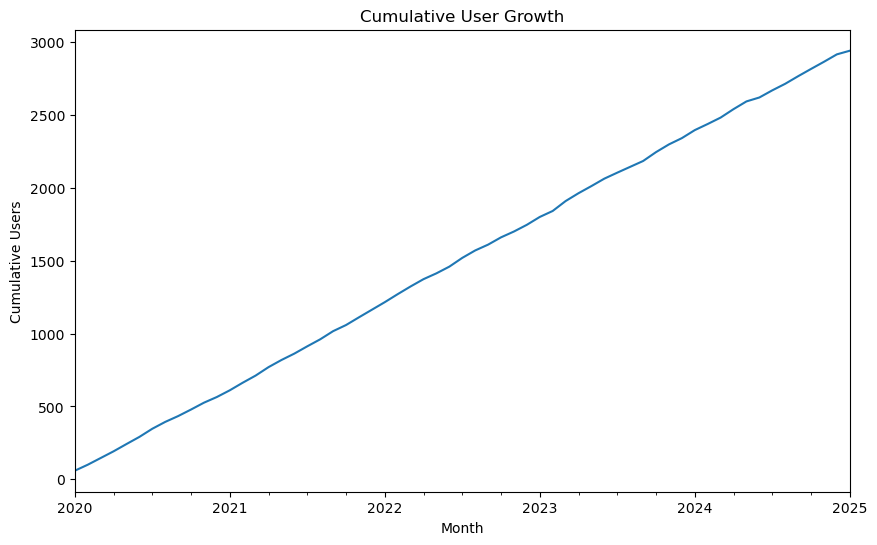

In [285]:
# 103. Calculate and plot the cumulative user growth.
cumulative_user_growth = monthly_new_users.cumsum()
plt.figure(figsize=(10, 6))
cumulative_user_growth.plot()
plt.title('Cumulative User Growth')
plt.xlabel('Month')
plt.ylabel('Cumulative Users')
plt.show()

In [287]:
# 104. Generate the monthly revenue report.
payments_df['transaction_date'] = pd.to_datetime(payments_df['transaction_date'])
payments_df['payment_month'] = payments_df['transaction_date'].dt.to_period('M')
monthly_revenue = payments_df.groupby('payment_month')['amount_paid'].sum()
print(f"104. Monthly revenue report:\n{monthly_revenue}")

104. Monthly revenue report:
payment_month
2025-01    4009.0
Freq: M, Name: amount_paid, dtype: float64


In [289]:
# 105. Generate the annual revenue report.
payments_df['payment_year'] = payments_df['transaction_date'].dt.to_period('Y')
annual_revenue = payments_df.groupby('payment_year')['amount_paid'].sum()
print(f"105. Annual revenue report:\n{annual_revenue}")

105. Annual revenue report:
payment_year
2025    4009.0
Freq: Y-DEC, Name: amount_paid, dtype: float64


In [291]:
# 106. Analyze whether there are more purchases on weekdays or weekends.
payments_df['day_of_week'] = payments_df['transaction_date'].dt.dayofweek
weekday_purchases = payments_df[payments_df['day_of_week'] < 5].shape[0]
weekend_purchases = payments_df[payments_df['day_of_week'] >= 5].shape[0]
print(f"106. Weekday purchases: {weekday_purchases}, Weekend purchases: {weekend_purchases}")

106. Weekday purchases: 30, Weekend purchases: 15


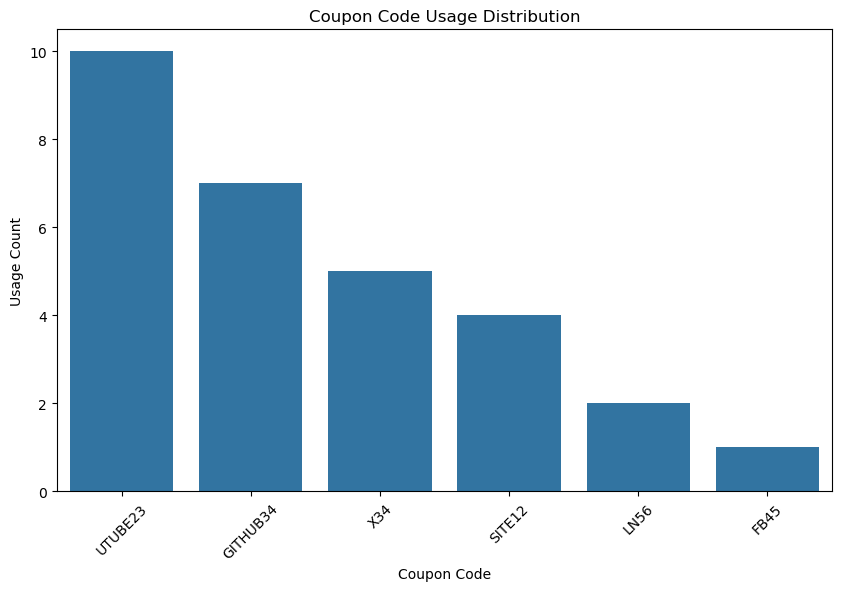

In [293]:
# 107. Which coupon code is used most frequently? Visualize the distribution of coupon code usage.
most_used_coupon = payments_df['coupon_code'].mode()[0]
coupon_usage = payments_df['coupon_code'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=coupon_usage.index, y=coupon_usage.values)
plt.title('Coupon Code Usage Distribution')
plt.xlabel('Coupon Code')
plt.ylabel('Usage Count')
plt.xticks(rotation=45)
plt.show()

In [295]:
# 108. Analyze completion rates by country.
completion_rate_by_country = enrollments_df.merge(users_df[['user_id', 'country']], left_on='student_id', right_on='user_id').merge(courses_df[
                                                    ['course_id', 'completion_rate']], on='course_id').groupby('country')['completion_rate'].mean()
print(f"108. Completion rates by country:\n{completion_rate_by_country}")

108. Completion rates by country:
country
China      41.676271
Germany    47.893333
India      45.494800
UK         39.162162
US         43.602800
Name: completion_rate, dtype: float64
